In [1]:
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt

from src.sdes import sde_kunita, sde_utils
import src.sdes.time as time

In [2]:
def x0(num_landmarks):
    x0_1 = jnp.linspace(0, 1, num_landmarks)
    x0_2 = jnp.zeros(num_landmarks)
    x0 = jnp.stack([x0_1, x0_2], axis=1).flatten()
    return x0

def sample_circle(num_landmarks: int, radius=1., centre=jnp.asarray([0, 0])) -> jnp.ndarray:
    theta = jnp.linspace(0, 2 * jnp.pi, num_landmarks, endpoint=False)
    x = jnp.cos(theta)
    y = jnp.sin(theta)
    return (radius * jnp.stack([x, y], axis=1) + centre).flatten()

Setup for both forward and reverse data generation

In [3]:
lots_of_landmarks = 200
less_landmarks = 5

x0_less = sample_circle(less_landmarks)
x0_lots = sample_circle(lots_of_landmarks)

num_trajs = 2
T = 1.
N = 100

keys = jax.random.split(jax.random.PRNGKey(0), num_trajs)

Forward data generation

In [4]:
forward_lots = sde_kunita.data_forward(x0_lots, T, N)
_, fw_trajs_lots, _ = forward_lots(keys)

forward_less = sde_kunita.data_forward(x0_less, T, N)
_, fw_trajs_less, _ = forward_less(keys)


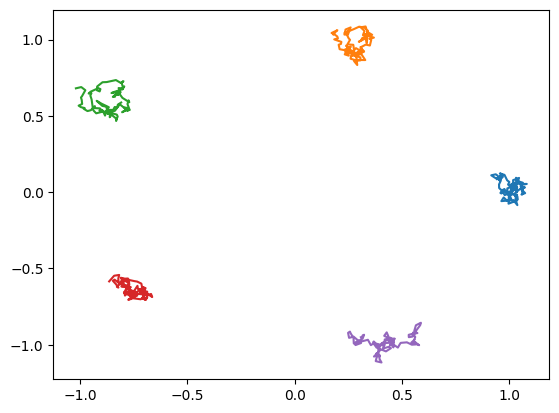

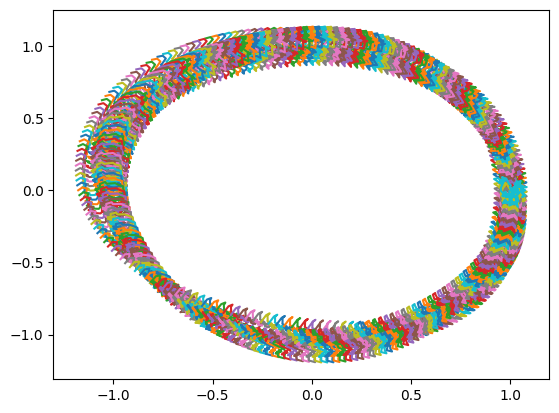

In [5]:
fw_trajs_lots = fw_trajs_lots.reshape(num_trajs, N, -1, 2)
fw_trajs_less = fw_trajs_less.reshape(num_trajs, N, -1, 2)

for landmark in jnp.arange(0,less_landmarks, 1):
    plt.plot(fw_trajs_less[0, :, landmark, 0], fw_trajs_less[0, :, landmark, 1])
plt.show()

for landmark in jnp.arange(0, lots_of_landmarks, 1):
    plt.plot(fw_trajs_lots[0, :, landmark, 0], fw_trajs_lots[0, :, landmark, 1])
plt.show()


Reverse data generation (without correction computation)

In [6]:
vector_fields = sde_kunita.vector_fields_reverse()
backward_lots = sde_utils.data_forward(x0_lots, T, N, vector_fields, bm_shape=(2 * 5 ** 2,))
_, bw_trajs_lots, _ = backward_lots(keys)


backward_less = sde_utils.data_forward(x0_less, T, N, vector_fields, bm_shape=(2 * 5 ** 2,))
_, bw_trajs_less, _ = backward_less(keys)

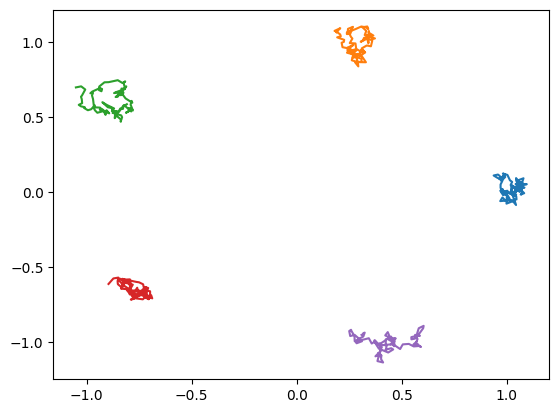

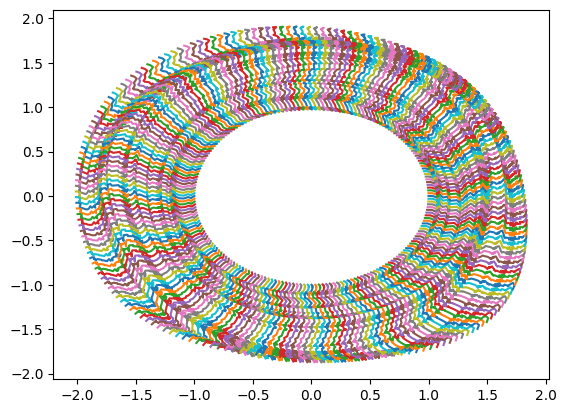

In [7]:
bw_trajs_lots = bw_trajs_lots.reshape(num_trajs, N, -1, 2)
bw_trajs_less = bw_trajs_less.reshape(num_trajs, N, -1, 2)

for landmark in jnp.arange(0, less_landmarks, 1):
    plt.plot(bw_trajs_less[0, :, landmark, 0], bw_trajs_less[0, :, landmark, 1])
plt.show()

for landmark in jnp.arange(0, lots_of_landmarks, 1):
    plt.plot(bw_trajs_lots[0, :, landmark, 0], bw_trajs_lots[0, :, landmark, 1])
plt.show()

Reverse data generation (with correction computation)

In [8]:
backward_lots = sde_kunita.data_reverse(x0_lots, T, N)
_, bw_trajs_lots, _ = backward_lots(keys)

backward_less = sde_kunita.data_reverse(x0_less, T, N)
_, bw_trajs_less, _ = backward_less(keys)

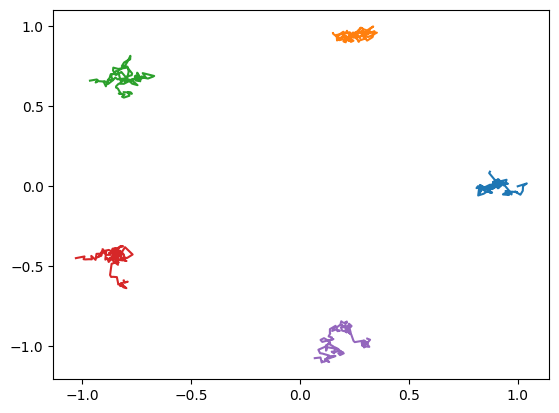

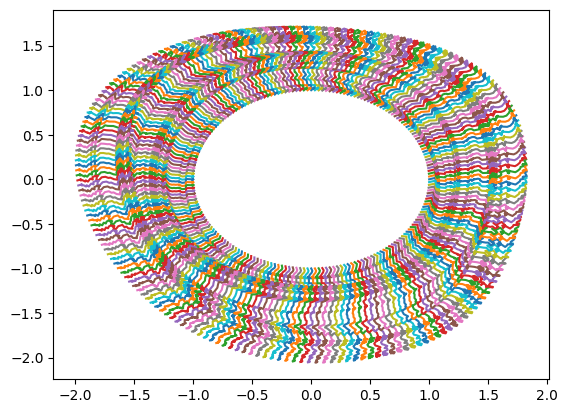

In [9]:
bw_trajs_lots = bw_trajs_lots.reshape(num_trajs, N, -1, 2)
bw_trajs_less = bw_trajs_less.reshape(num_trajs, N, -1, 2)

for landmark in jnp.arange(0, less_landmarks, 1):
    plt.plot(bw_trajs_less[0, :, landmark, 0], bw_trajs_less[0, :, landmark, 1])
plt.show()

for landmark in jnp.arange(0, lots_of_landmarks, 1):
    plt.plot(bw_trajs_lots[0, :, landmark, 0], bw_trajs_lots[0, :, landmark, 1])
plt.show()